## importing the required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import xgboost as xgb
# import catboost as cat_
# import lightgbm as lgb
# import optuna.integration.lightgbm as lgb2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, log_loss

## Reading dataset

In [2]:
data = pd.read_csv("../data/Fertilizer Prediction.csv")


def data_information(data):
    print('Data Information Table')
    display(data.info(verbose=True, show_counts=True))
    print('\n Data Head Table')
    display(data.head())
    print('\n Data Describe Information Table')
    display(data.describe())
    print(f'\n Data Shape: {data.shape}')
    print(f'\n Data Columns {data.columns}')
    print('\n Data Null item Information Table')
    return

In [3]:
data_information(data)

Data Information Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


None


 Data Head Table


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea



 Data Describe Information Table


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000



 Data Shape: (99, 9)

 Data Columns Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

 Data Null item Information Table


## Visualisation

In [4]:
def make_pie(feature):
    sns.set(rc={'figure.figsize': (8, 8)})
    plt.pie(
        data[feature].value_counts(),
        labels=list(data[feature].value_counts().index),
        autopct='%1.2f%%',
        labeldistance=1.1,
        explode=[0.05 for i in range(len(data[feature].value_counts()))]
    )
    plt.show()

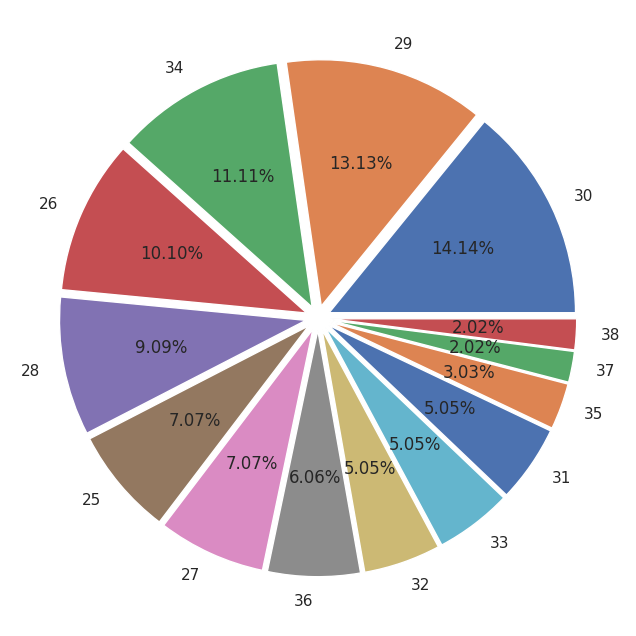

In [5]:
make_pie('Temparature')

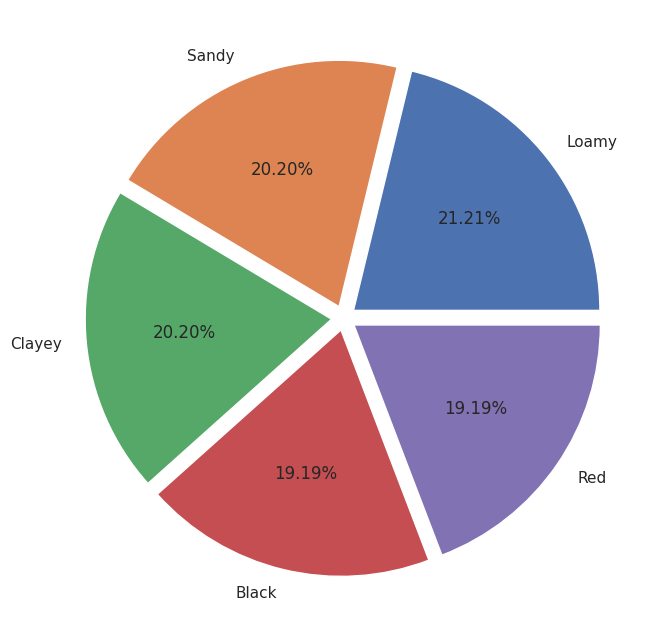

In [6]:
make_pie('Soil Type')

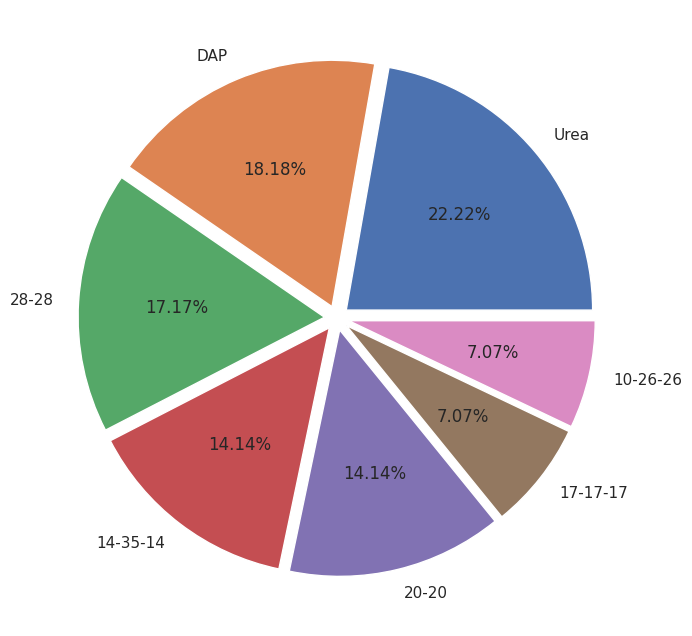

In [7]:
make_pie('Fertilizer Name')

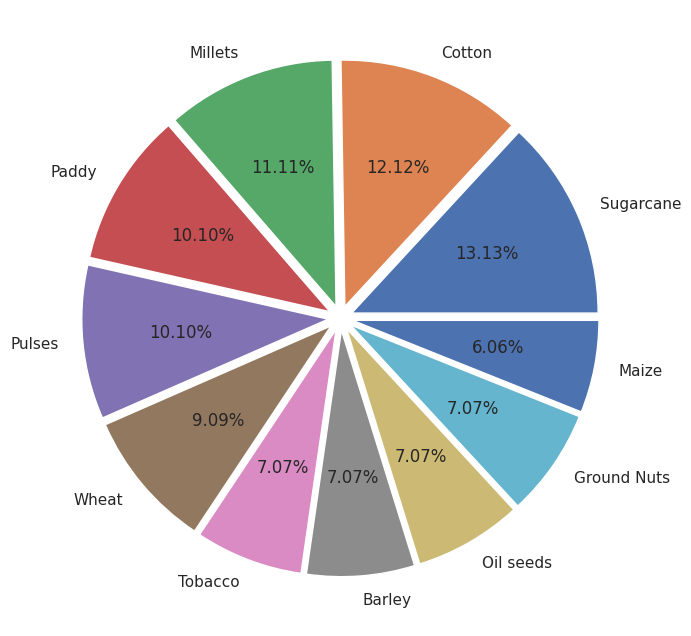

In [8]:
make_pie('Crop Type')

## Data engineering

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [10]:
a = [x for x in range(100)]
labels = [
    dict(zip(data["Soil Type"].unique(), a)),
    dict(zip(data["Crop Type"].unique(), a)),
    dict(zip(data["Fertilizer Name"].unique(), a))
]

data["Soil_Code"] = data["Soil Type"].map(labels[0])
data["Crop_Code"] = data["Crop Type"].map(labels[1])
data["Fertilizer_Code"] = data["Fertilizer Name"].map(labels[2])
data.drop(["Soil Type"], axis=1, inplace=True)
data.drop(["Crop Type"], axis=1, inplace=True)
data.drop(["Fertilizer Name"], axis=1, inplace=True)

data.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Code,Crop_Code,Fertilizer_Code
0,26,52,38,37,0,0,0,0,0
1,29,52,45,12,0,36,1,1,1
2,34,65,62,7,9,30,2,2,2
3,32,62,34,22,0,20,3,3,3
4,28,54,46,35,0,0,4,4,0


In [11]:
labels

[{'Sandy': 0, 'Loamy': 1, 'Black': 2, 'Red': 3, 'Clayey': 4},
 {'Maize': 0,
  'Sugarcane': 1,
  'Cotton': 2,
  'Tobacco': 3,
  'Paddy': 4,
  'Barley': 5,
  'Wheat': 6,
  'Millets': 7,
  'Oil seeds': 8,
  'Pulses': 9,
  'Ground Nuts': 10},
 {'Urea': 0,
  'DAP': 1,
  '14-35-14': 2,
  '28-28': 3,
  '17-17-17': 4,
  '20-20': 5,
  '10-26-26': 6}]

## Model

In [12]:
X = data.drop('Fertilizer_Code', axis=1).copy()
y = data['Fertilizer_Code'].copy()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
ms = MinMaxScaler()
ct = ColumnTransformer(transformers=[('MMS', ms, [0, 1, 2 ,3, 4, 5, 6, 7])], remainder='passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

display(accuracy_score(y_test, y_pred))
display(accuracy_score(y_train, y_pred_train))

1.0

1.0

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
import joblib

joblib.dump(classifier, "model.jbl.lzma")
joblib.dump(ct, "colTrans.jbl.lzma")

['colTrans.jbl.lzma']

In [21]:
import json

with open("labels.json", "w") as f:
    json.dump(labels, f)